## <font color='purple'> Assignment 04 - Transfer Learning and Bounding Boxes and YOLOV8

<font color='purple'> Follow the steps in YOLOV8 and attach a screenshot of object detection

Windows: https://medium.com/@pat.x.guillen/a-step-by-step-guide-to-running-yolov8-on-windows-122cb586b567Links to an external site.

Mac: https://pysource.com/2023/03/28/object-detection-with-yolo-v8-on-mac-m1/Links to an external site.

https://universe.roboflow.com/pxrksuhn/aihub-aizqc/dataset/1#

Use the dataset mentioned above.

### <font color='blue'> Object Detection using Yolo v8

<font color='blue'> Install dependencies

In [1]:
!pip install requests

<font color='blue'> Import Libraries

In [2]:
from ultralytics import YOLO
import cv2
import pkg_resources
import matplotlib.pyplot as plt
import torch
from IPython.display import display, Image
import glob

/var/folders/f9/tzl1jwjn3f3fvhyb_dm77j6h0000gn/T/ipykernel_77998/88229271.py:3: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


<font color='blue'> Validate the Ultralytics Version number

In [3]:
version = pkg_resources.get_distribution("ultralytics").version
print(version)

8.2.102


<font color='blue'> MacOS does not have CUDA support. So by default, the torch library does not use GPU acceleration. Forcing GPU here using MPS, otherwise it will default to CPU.

In [4]:
device = "mps" if torch.backends.mps.is_available() else "cpu"

<font color='blue'> Load Yolo V8 Model

In [5]:
model = YOLO('yolov8n.pt')

<font color='blue'> Train the model with custom data

In [6]:
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=25 imgsz=224

New https://pypi.org/project/ultralytics/8.2.102 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.101 🚀 Python-3.12.3 torch-2.4.1 CPU (Apple M3 Pro)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sav

<font color='blue'> Validate the metrics from the runs directory

In [7]:
!ls runs/detect/train/

F1_curve.png
PR_curve.png
P_curve.png
R_curve.png
args.yaml
confusion_matrix.png
confusion_matrix_normalized.png
events.out.tfevents.1727512646.Eshitas-MacBook-Pro.local.78002.0
labels.jpg
labels_correlogram.jpg
results.csv
results.png
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
train_batch510.jpg
train_batch511.jpg
train_batch512.jpg
val_batch0_labels.jpg
val_batch0_pred.jpg
val_batch1_labels.jpg
val_batch1_pred.jpg
weights


<font color='blue'> Visualize the confusion matrix

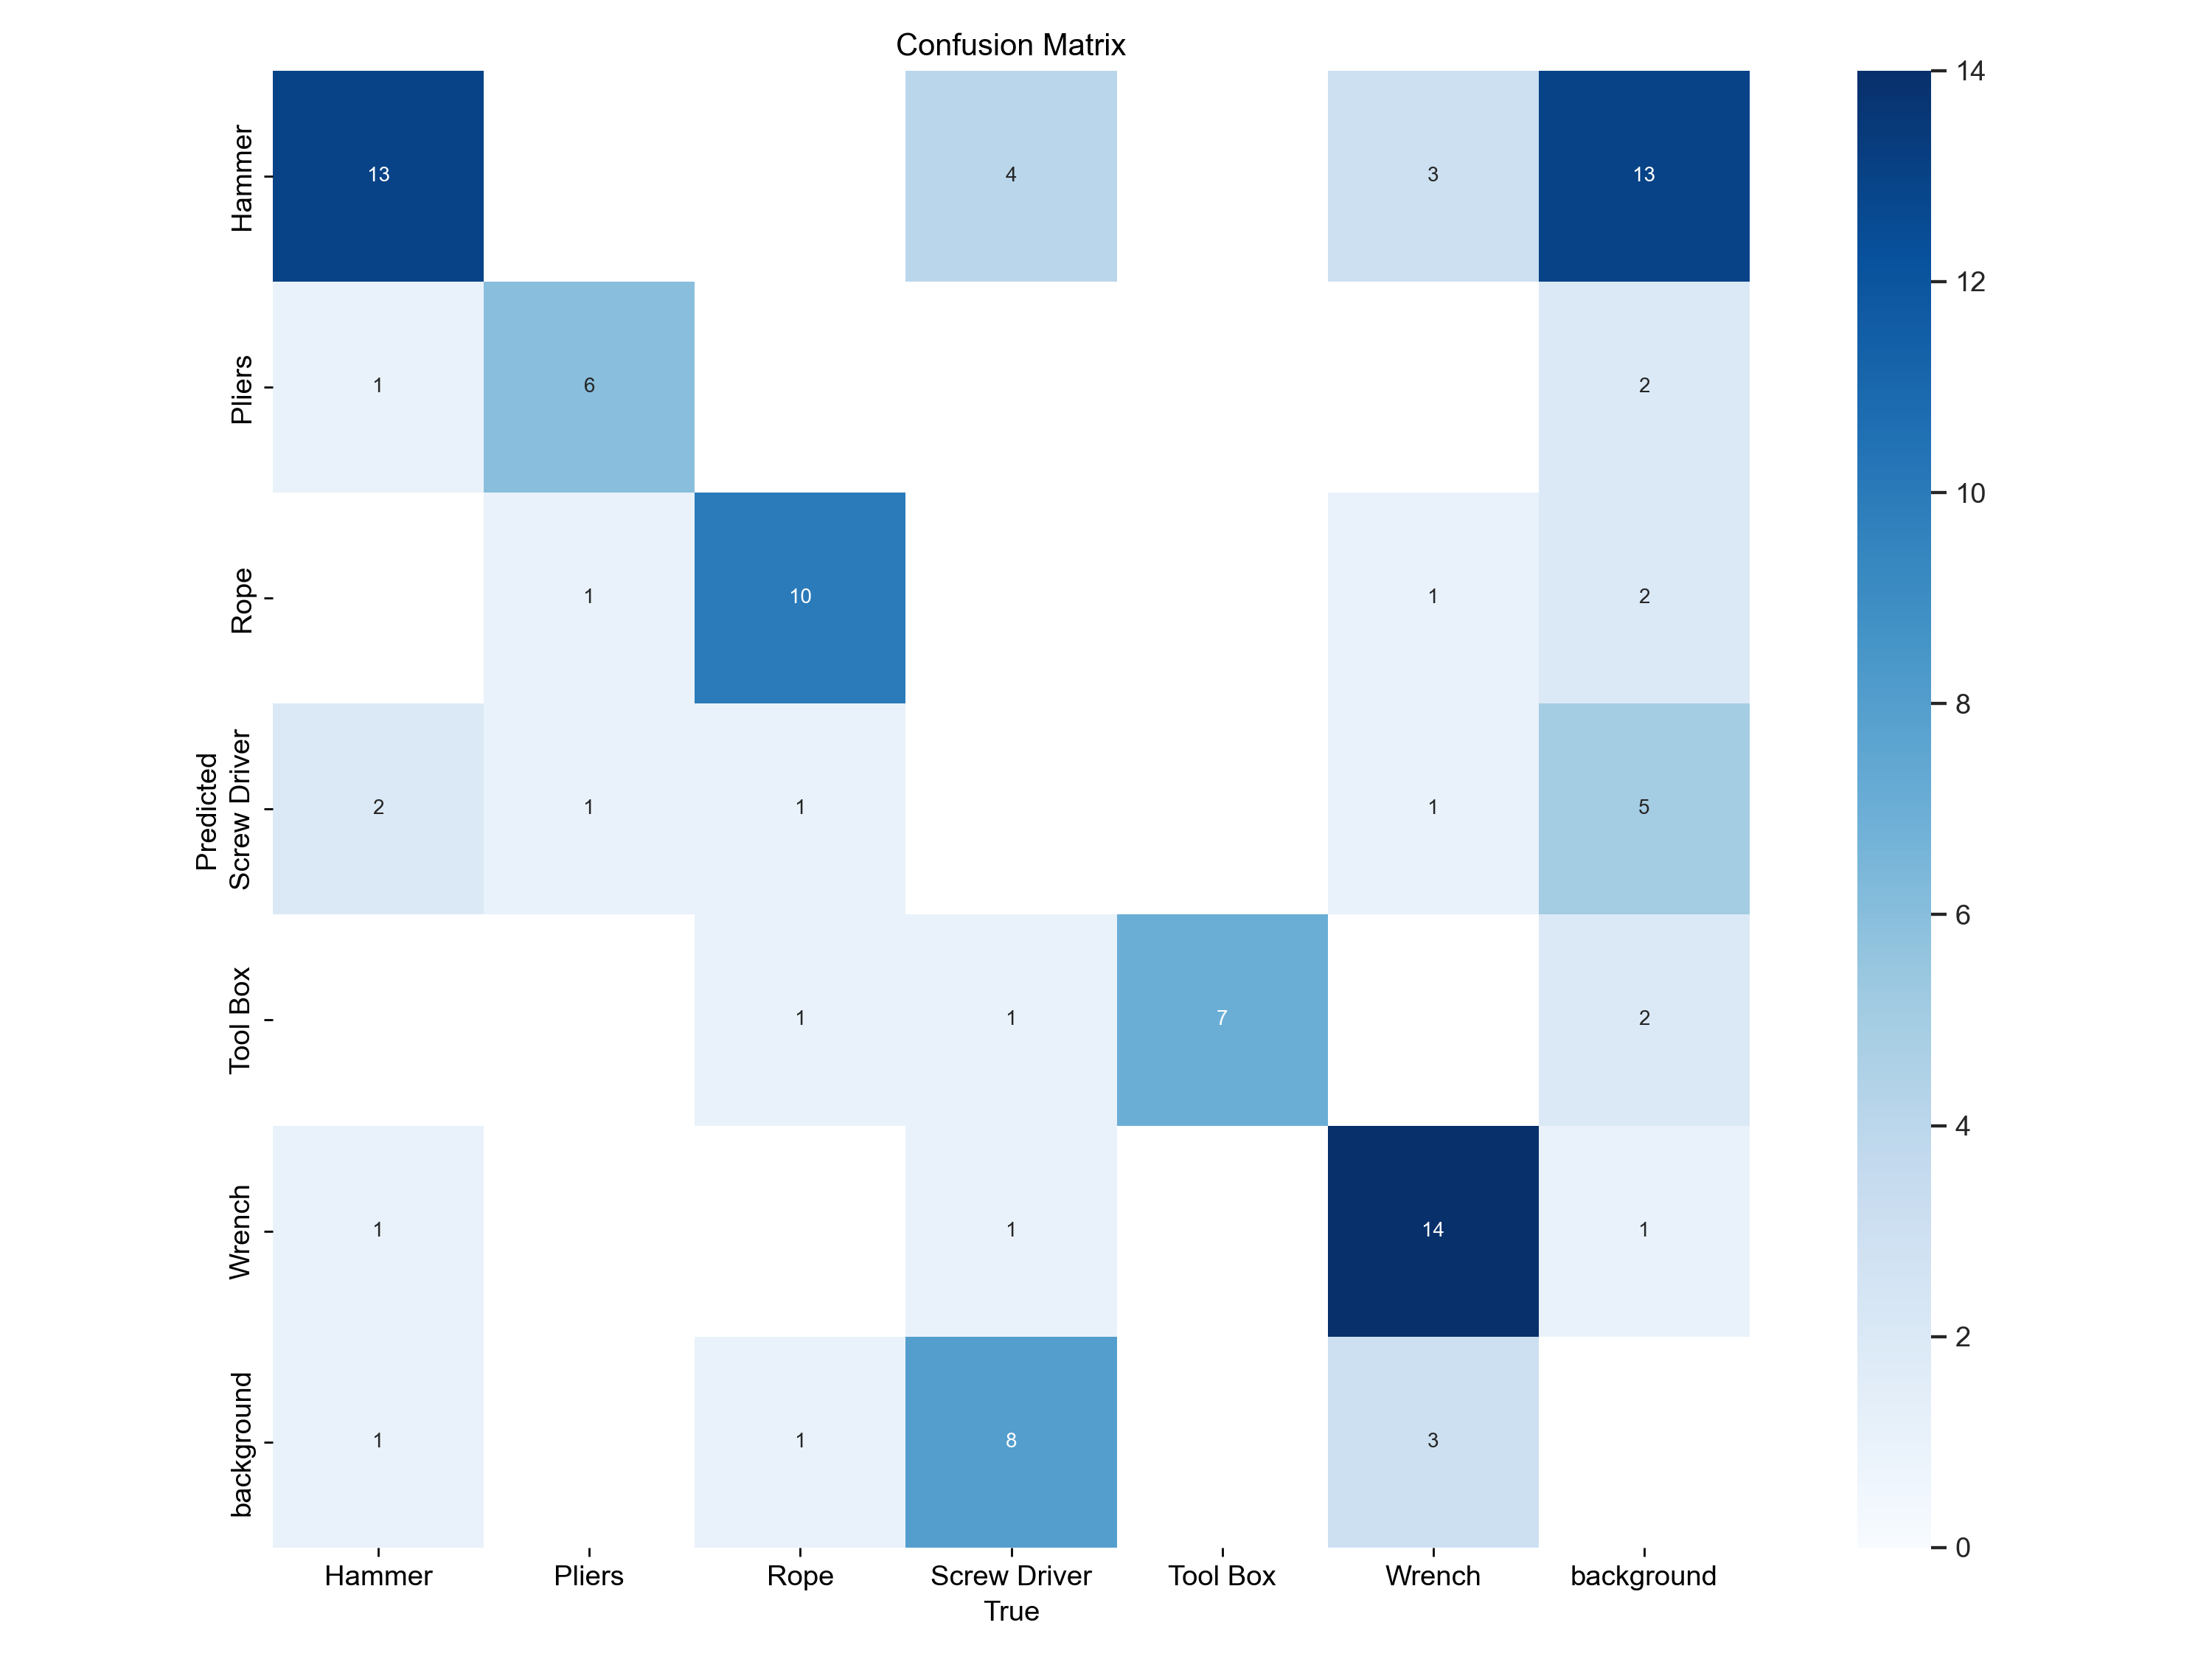

In [8]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

<font color='blue'> Visualize the results file representing different metrics

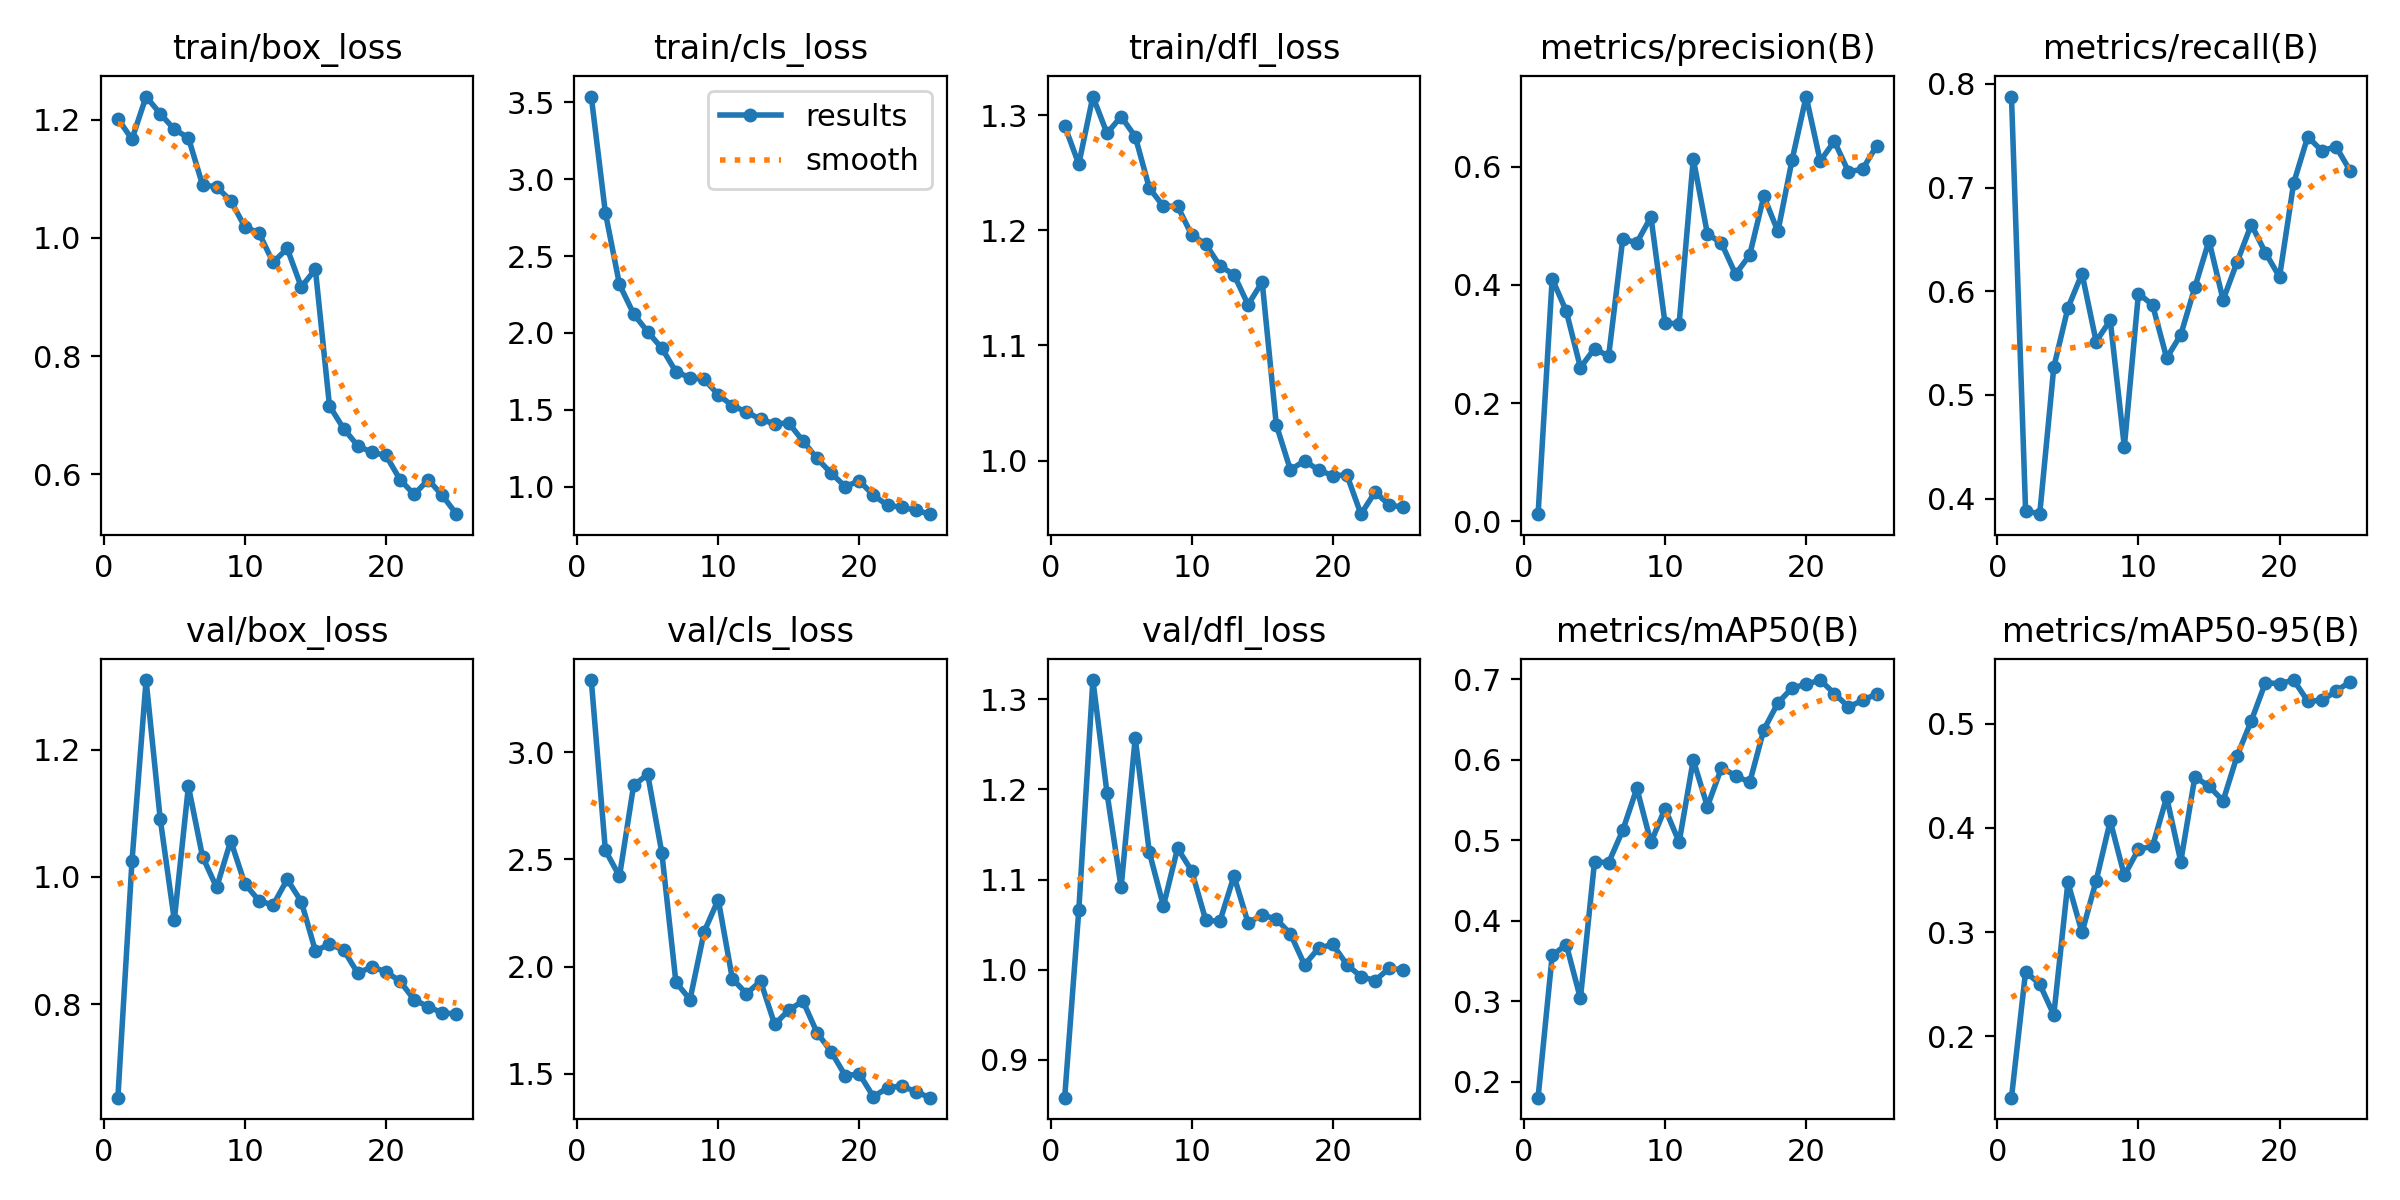

In [9]:
Image(filename='runs/detect/train/results.png', width=600)

<font color='blue'> View the batch predictions

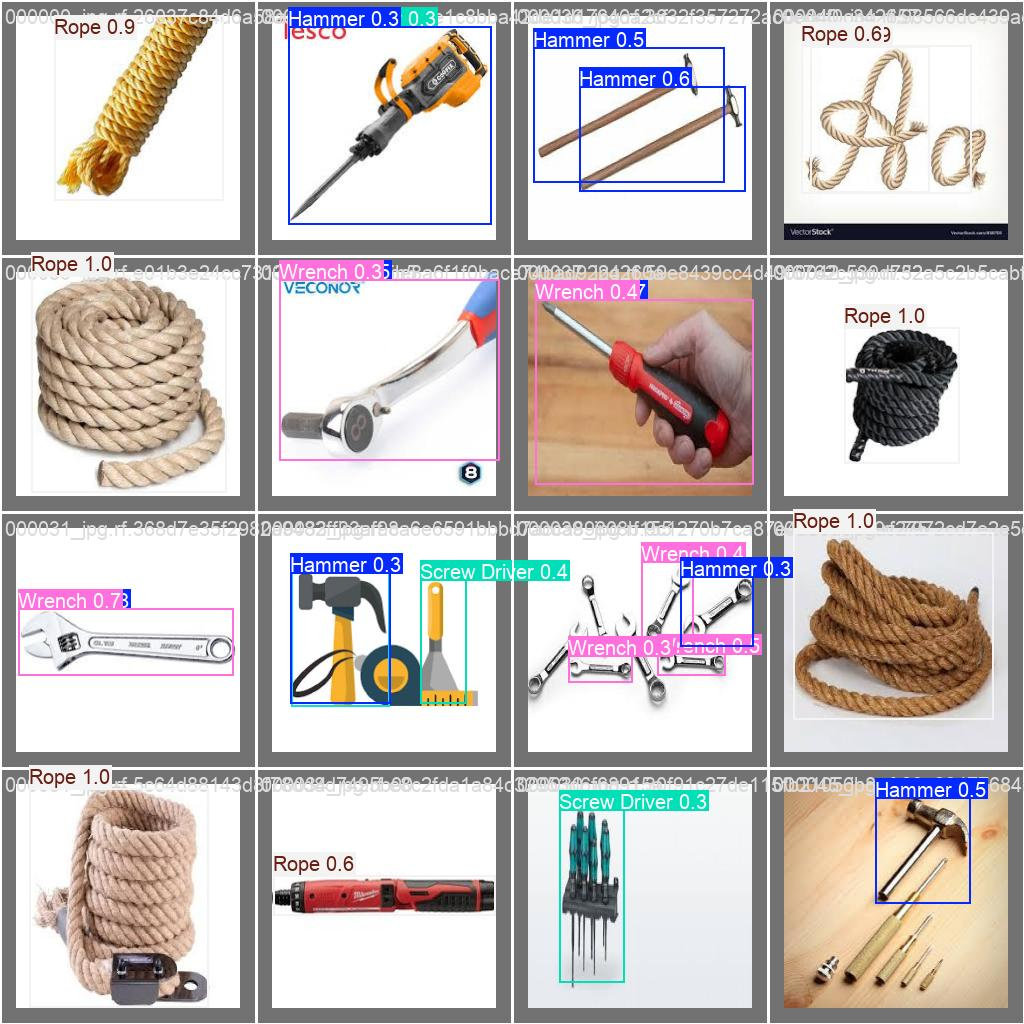

In [10]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

<font color='blue'> Validate the custom model using validate dataset

In [11]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.101 🚀 Python-3.12.3 torch-2.4.1 CPU (Apple M3 Pro)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /Users/eshitagupta/Study/Fall 2024/DATA 255/HW/HW-4/Ques2/yolo/val
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         51         82      0.609      0.704      0.699      0.543
                Hammer          7         18      0.508      0.889      0.705      0.575
                Pliers          7          8      0.627       0.75      0.721      0.521
                  Rope         12         13      0.712      0.769      0.818      0.687
          Screw Driver          8         14      0.292      0.237        0.2      0.154
              Tool Box          6          7      0.651          1      0.933      0.712
                Wrench         12         22      0.865      0.581      0.819      0.606
Speed: 0.1ms preprocess, 25.0ms inference, 0.0ms loss, 0.3ms p

<font color='blue'> Perform inference on the test dataset

In [12]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=test/images

Ultralytics YOLOv8.2.101 🚀 Python-3.12.3 torch-2.4.1 CPU (Apple M3 Pro)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs

image 1/26 /Users/eshitagupta/Study/Fall 2024/DATA 255/HW/HW-4/Ques2/yolo/test/images/000002_jpg.rf.3fe959f5175a87e988c5a5f69d779fcd.jpg: 224x224 1 Rope, 8.6ms
image 2/26 /Users/eshitagupta/Study/Fall 2024/DATA 255/HW/HW-4/Ques2/yolo/test/images/000007_jpg.rf.4fea82fe27d57392d3bea4fee5d955f2.jpg: 224x224 1 Rope, 9.4ms
image 3/26 /Users/eshitagupta/Study/Fall 2024/DATA 255/HW/HW-4/Ques2/yolo/test/images/000007_jpg.rf.60dbc245bf7d0b7c5455cf7333f99164.jpg: 224x224 2 Wrenchs, 5.5ms
image 4/26 /Users/eshitagupta/Study/Fall 2024/DATA 255/HW/HW-4/Ques2/yolo/test/images/000008_jpg.rf.1c9fac7314f7c395684d767630d8435a.jpg: 224x224 1 Hammer, 6.0ms
image 5/26 /Users/eshitagupta/Study/Fall 2024/DATA 255/HW/HW-4/Ques2/yolo/test/images/000008_jpg.rf.2ec3ae0f45aad59174c2139b1ab2c04c.jpg: 224x224 1 Hammer, 6.2ms
image 6/26 /Users/eshitagupta/Study/Fal

<font color='blue'> View the final results

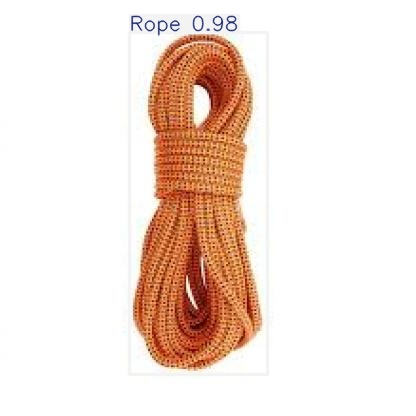

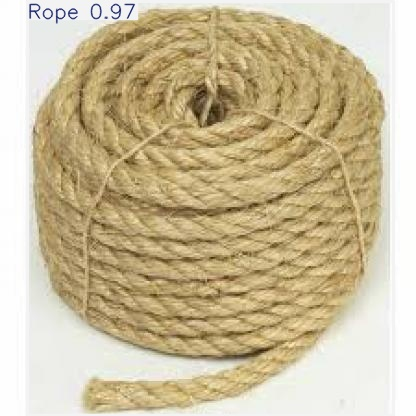

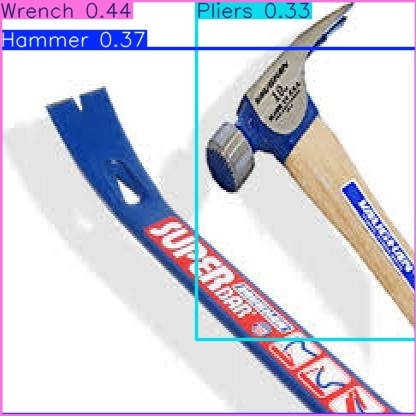

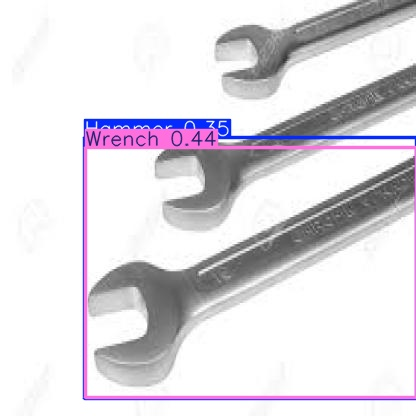

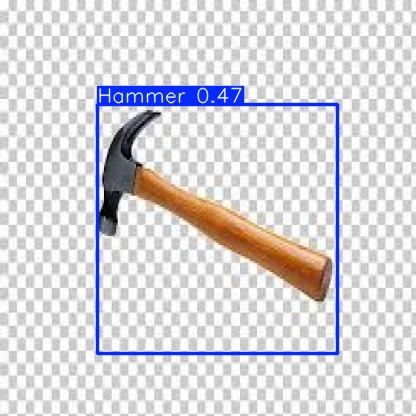

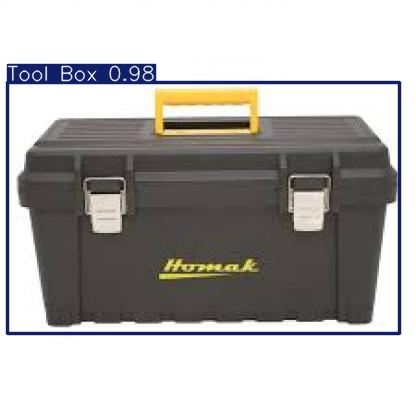

In [13]:
for image_path in glob.glob('runs/detect/predict/*.jpg')[:6]:
      display(Image(filename=image_path, width=300))
      print("\n")

<font color='blue'> <b> Modelling with Detectron in another file.

## <font color='purple'> Thank You!!